# Capstone Project: Analisis Faktor Kinerja Akademik & Prediksi Kelulusan
**Oleh: Devin Rafa - Informatika, Universitas Jenderal Soedirman**

## 1. Latar Belakang & Tujuan Proyek
Kinerja akademik mahasiswa dipengaruhi oleh berbagai faktor gaya hidup. Proyek ini bertujuan untuk:
1.  Menganalisis hubungan antara jam belajar, jam tidur, tingkat kehadiran, dan skor sebelumnya terhadap nilai ujian akhir.
2.  Menggunakan model AI (IBM Granite) untuk **mengklasifikasikan** (memprediksi) status kelulusan mahasiswa ("Lulus" atau "Gagal") berdasarkan data tersebut.
3.  Membuat **peringkasan** profil mahasiswa yang berhasil dan yang gagal untuk mendapatkan wawasan yang dapat ditindaklanjuti.

dataset yang saya pakai adalah dattaset publik yang berasal/bersumber dari situs dataset kaggle dimana disitu telah disediakan data dari para siswa/mahasiswa dengan daftar data : jam belajar, jam tidur, tingkat kehadiran, dan skor sebelumnya terhadap nilai ujian akhir

link kaggle : https://www.kaggle.com/datasets/emanfatima2025/student-academic-performance-trends

Dimana saya akan menggunakan nya dengan cara mengexport file dengan format csv yang sudah saya simpan di lokal folder saya

saya disini mencari sebuah datasetnya dengan sendiri, dan menyusun program milesstone dengan bantuan AI dalam setiap langkah saya.

## LANGKAH 2: SETUP ENVIRONMENT & KONEKSI API

Tahap ini menginstal semua library yang dibutuhkan dan menghubungkan notebook

dengan model AI IBM Granite melalui API Replicate.

In [9]:
# 2.1. Instalasi Library
print("Menginstal library yang dibutuhkan dan sesuai dengan peeengajaran yang ada di lab 1 dan 2")
!pip install langchain_community
!pip install replicate

# 2.2. Import Library & Koneksi API
import os
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import userdata
from langchain_community.llms import Replicate

print("\nProses instalasi selesai. Menghubungkan ke API...")

try:
    print("Menghubungkan ke API...")

    # Mengambil API token dari Colab Secrets
    api_token = userdata.get('api_token')
    os.environ["REPLICATE_API_TOKEN"] = api_token

    # Model setup (menggunakan gaya penulisan dari lab Anda)
    model = "ibm-granite/granite-3.3-8b-instruct"
    output = Replicate(
        model=model,
        replicate_api_token=api_token,
    )

    print(f"SUKSES! Setup selesai. Model siap digunakan dengan nama variabel {output}.")
except Exception as e:
    print(f"GAGAL! Terjadi kesalahan: {e}")

Menginstal library yang dibutuhkan dan sesuai dengan peeengajaran yang ada di lab 1 dan 2

Proses instalasi selesai. Menghubungkan ke API...
Menghubungkan ke API...
SUKSES! Setup selesai. Model siap digunakan dengan nama variabel Replicate
Params: {'model': 'ibm-granite/granite-3.3-8b-instruct', 'model_kwargs': {}}.


### LANGKAH 3: MEMUAT DATASET ASLI DARI KAGGLE

In [10]:
import pandas as pd

# Memilih file yang sudah sayaaa siapkan
file_name = 'student_exam_scores.csv'
df = pd.read_csv(file_name)

print(f"Dataset asli '{file_name}' dari Kaggle berhasil dimuat.")
print(f"Total data: {len(df)} baris.") # Akan menampilkan jumlah baris yang banyak
display(df.head(200)) # Menampilkan 200 baris data asli


Dataset asli 'student_exam_scores.csv' dari Kaggle berhasil dimuat.
Total data: 200 baris.


,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0


### LANGKAH 4: ANALISIS DATA EKSPLORATIF (EDA) - STATISTIK
 Pada tahap ini, saya akan mengenalkan model ai dengan data untuk memahami karakteristiknya.

In [11]:
print("--- (4.1) Informasi Umum Dataset ---")
# .info() memberikan ringkasan struktur data, tipe kolom, dan data non-null.
df.info()

print("\n\n--- (4.2) Statistik Deskriptif ---")
# .describe() memberikan statistik penting seperti rata-rata, standar deviasi, min, dan max.
display(df.describe())

print("\n\n--- (4.3) Pengecekan Data Kosong (Missing Values) ---")
# Mengecek apakah ada data yang hilang di setiap kolom.
print(df.isnull().sum())

--- (4.1) Informasi Umum Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


--- (4.2) Statistik Deskriptif ---


,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000




--- (4.3) Pengecekan Data Kosong (Missing Values) ---
student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64


### LANGKAH 5: ANALISIS DATA EKSPLORATIF (EDA) - VISUALISASI
Visualisasi membantu melihat pola dalam data yang sulit dilihat dari angka saja.

Membuat visualisasi data...


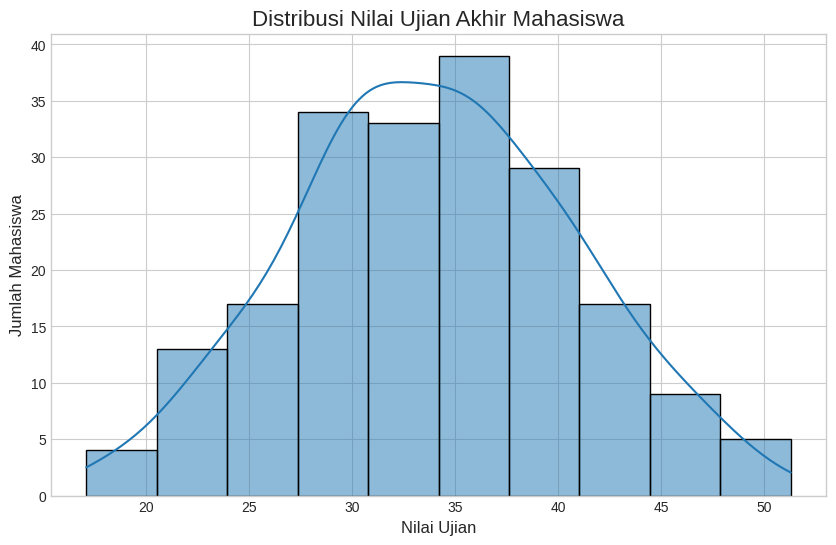

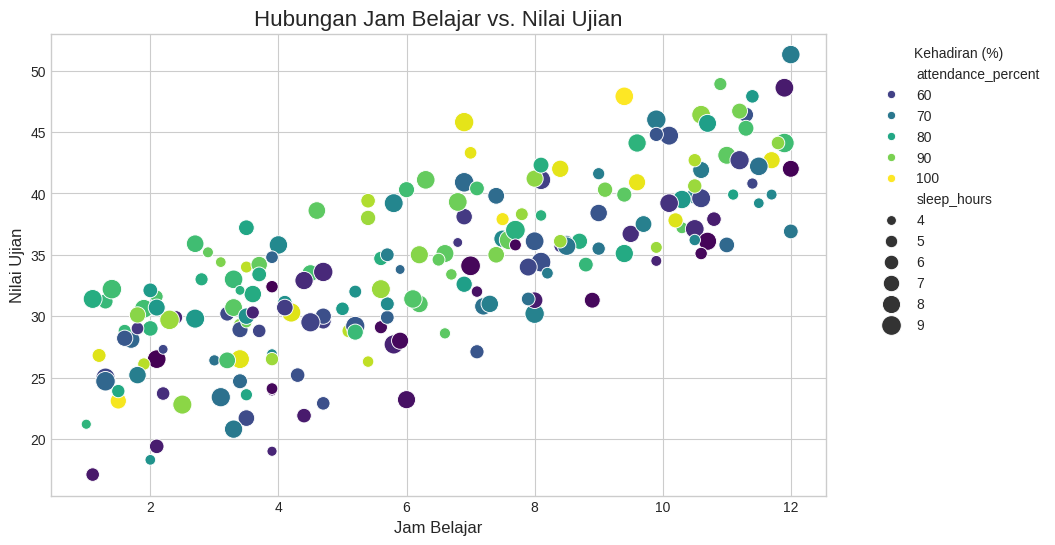


--- Matriks Hubungan Antar Semua Variabel ---


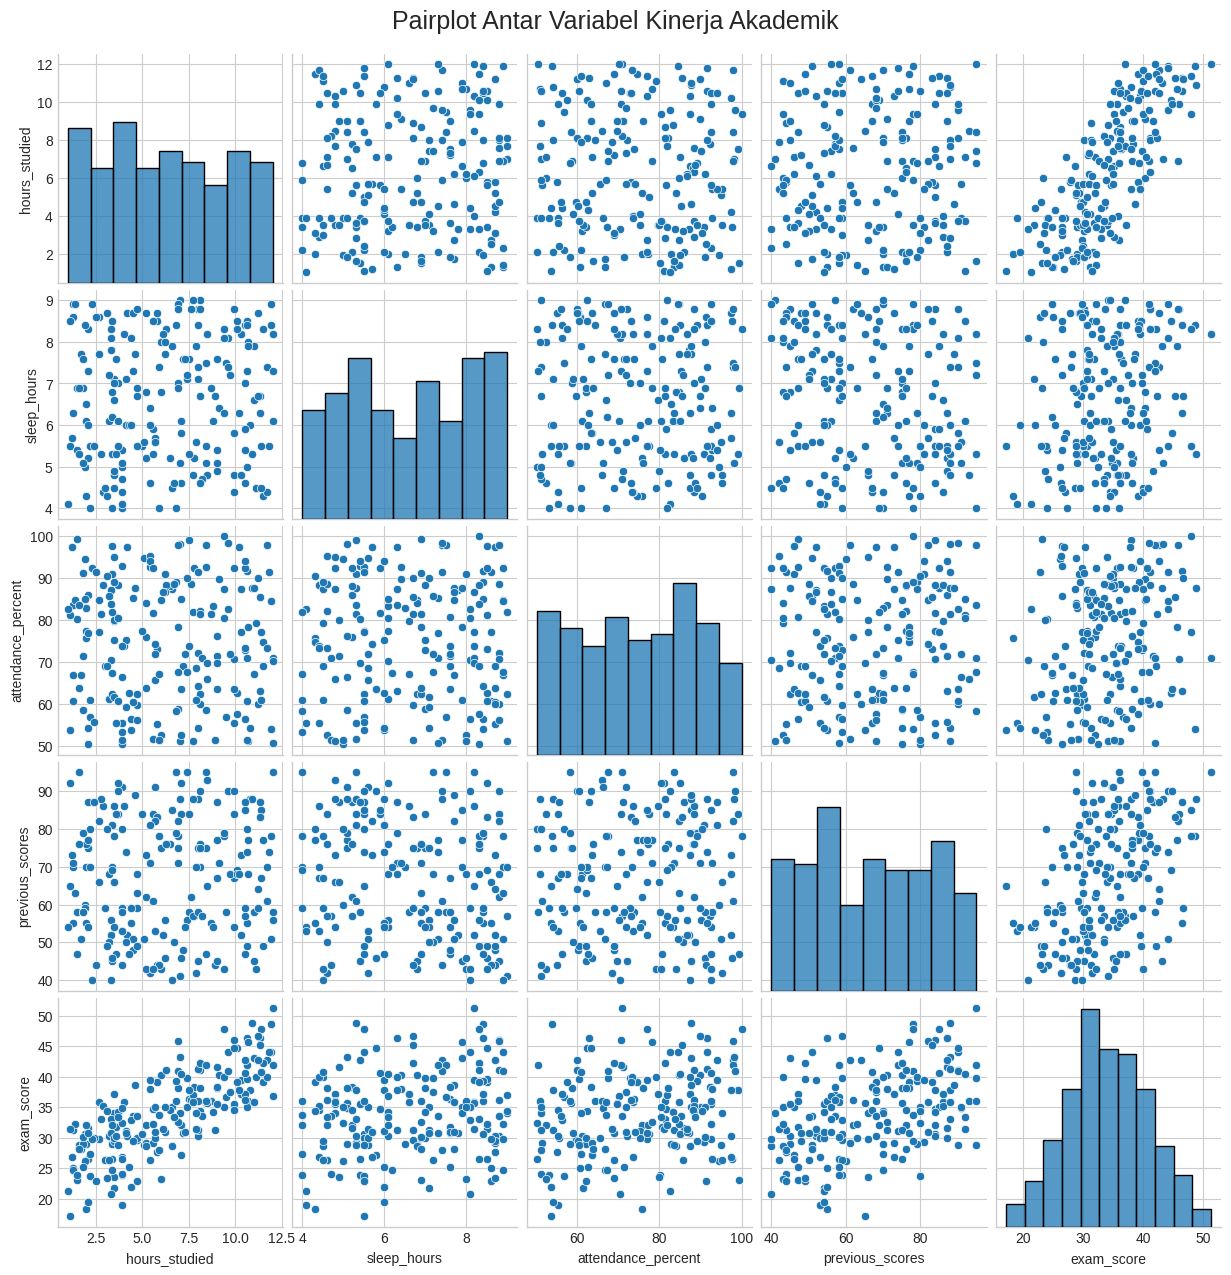

In [12]:
print("Membuat visualisasi data...")
plt.style.use('seaborn-v0_8-whitegrid')

# 5.1. Distribusi Nilai Ujian
plt.figure(figsize=(10, 6))
sns.histplot(df['exam_score'], kde=True, bins=10)
plt.title('Distribusi Nilai Ujian Akhir Mahasiswa', fontsize=16)
plt.xlabel('Nilai Ujian', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)
plt.show()

# 5.2. Hubungan Antar Variabel (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hours_studied', y='exam_score', hue='attendance_percent', size='sleep_hours', sizes=(50, 200), palette='viridis')
plt.title('Hubungan Jam Belajar vs. Nilai Ujian', fontsize=16)
plt.xlabel('Jam Belajar', fontsize=12)
plt.ylabel('Nilai Ujian', fontsize=12)
plt.legend(title='Kehadiran (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 5.3. Pairplot untuk melihat semua hubungan
print("\n--- Matriks Hubungan Antar Semua Variabel ---")
sns.pairplot(df.drop('student_id', axis=1))
plt.suptitle('Pairplot Antar Variabel Kinerja Akademik', y=1.02, fontsize=18)
plt.show()

### LANGKAH 6: FEATURE ENGINEERING - MEMBUAT TARGET KLASIFIKASI
mengadaptasi dataset ini untuk tugas KLASIFIKASI.
membuat kolom baru 'status_kelulusan' berdasarkan nilai 'exam_score'.
Ini adalah langkah paling penting untuk menyesuaikan proyek dengan materi yang saya gunakan.

Kolom baru 'status_kelulusan' berhasil dibuat dengan batas kelulusan >= 75.


,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score,status_kelulusan
0,S001,8.0,8.8,72.1,45,30.2,Gagal
1,S002,1.3,8.6,60.7,55,25.0,Gagal
2,S003,4.0,8.2,73.7,86,35.8,Gagal
3,S004,3.5,4.8,95.1,66,34.0,Gagal
4,S005,9.1,6.4,89.8,71,40.3,Gagal
...,...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7,Gagal
196,S197,7.1,6.1,85.1,92,40.4,Gagal
197,S198,1.6,6.9,63.8,76,28.2,Gagal
198,S199,12.0,7.3,50.5,58,42.0,Gagal


/tmp/ipython-input-4104340935.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status_kelulusan', palette=['#E74C3C', '#2ECC71'])
/tmp/ipython-input-4104340935.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(data=df, x='status_kelulusan', palette=['#E74C3C', '#2ECC71'])


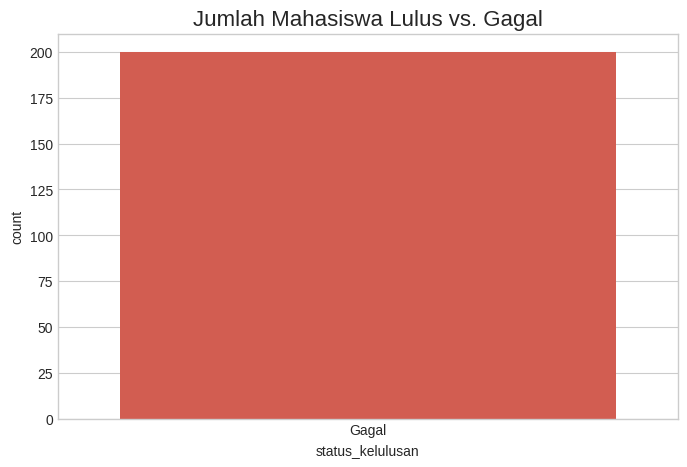

In [13]:
# Menentukan batas kelulusan (KKM), misalnya nilai 75
passing_score = 75

# Membuat fungsi untuk menentukan status
def tentukan_status(score):
    if score >= passing_score:
        return "Lulus"
    else:
        return "Gagal"

# Menerapkan fungsi ke kolom 'exam_score' untuk membuat kolom baru
df['status_kelulusan'] = df['exam_score'].apply(tentukan_status)

print(f"Kolom baru 'status_kelulusan' berhasil dibuat dengan batas kelulusan >= {passing_score}.")
display(df)

# Visualisasi hasil klasifikasi
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='status_kelulusan', palette=['#E74C3C', '#2ECC71'])
plt.title('Jumlah Mahasiswa Lulus vs. Gagal', fontsize=16)
plt.show()

### LANGKAH 7: PERSIAPAN DATA UNTUK PROMPT AI
Model LLM seperti IBM Granite memahami bahasa manusia. jadi saaya ubah data numerik nya menjadi format teks (kalimat) agar mudah dipahami oleh AI IBM yang saaaya pakaaaaaai.

In [14]:
def format_data_for_prompt(df_slice):
    text_data = []
    for index, row in df_slice.iterrows():
        text = (f"Data Mahasiswa ID {row['student_id']}:\n" # Cukup hapus int()
                f"- Jam Belajar per hari: {row['hours_studied']} jam\n"
                f"- Jam Tidur per hari: {row['sleep_hours']} jam\n"
                f"- Persentase Kehadiran: {row['attendance_percent']}%\n"
                f"- Skor Ujian Sebelumnya: {row['previous_scores']}\n"
               )
        text_data.append(text)
    return "\n".join(text_data)

# Mempersiapkan data untuk dikirim ke AI
data_for_ai = format_data_for_prompt(df)

print("--- Data yang Siap Dikirim ke AI (Format Teks) ---")
print(data_for_ai)

--- Data yang Siap Dikirim ke AI (Format Teks) ---
Data Mahasiswa ID S001:
- Jam Belajar per hari: 8.0 jam
- Jam Tidur per hari: 8.8 jam
- Persentase Kehadiran: 72.1%
- Skor Ujian Sebelumnya: 45

Data Mahasiswa ID S002:
- Jam Belajar per hari: 1.3 jam
- Jam Tidur per hari: 8.6 jam
- Persentase Kehadiran: 60.7%
- Skor Ujian Sebelumnya: 55

Data Mahasiswa ID S003:
- Jam Belajar per hari: 4.0 jam
- Jam Tidur per hari: 8.2 jam
- Persentase Kehadiran: 73.7%
- Skor Ujian Sebelumnya: 86

Data Mahasiswa ID S004:
- Jam Belajar per hari: 3.5 jam
- Jam Tidur per hari: 4.8 jam
- Persentase Kehadiran: 95.1%
- Skor Ujian Sebelumnya: 66

Data Mahasiswa ID S005:
- Jam Belajar per hari: 9.1 jam
- Jam Tidur per hari: 6.4 jam
- Persentase Kehadiran: 89.8%
- Skor Ujian Sebelumnya: 71

Data Mahasiswa ID S006:
- Jam Belajar per hari: 8.4 jam
- Jam Tidur per hari: 5.1 jam
- Persentase Kehadiran: 58.5%
- Skor Ujian Sebelumnya: 75

Data Mahasiswa ID S007:
- Jam Belajar per hari: 10.8 jam
- Jam Tidur per hari: 

### LANGKAH 8: EKSEKUSI KLASIFIKASI DENGAN BATCH PROCESSING
Cell ini mengirimkan data mahasiswa yang telah diformat ke model AI untuk mendapatkan prediksi status kelulusan.

In [15]:
import time # Kita butuh library time untuk memberi jeda

# Ukuran setiap batch (misalnya, 50 siswa per permintaan)
batch_size = 50
hasil_klasifikasi_lengkap = [] # List untuk menampung semua hasil

print(f"Memulai proses klasifikasi untuk {len(df)} mahasiswa dalam batch @{batch_size}...")

# Loop untuk setiap batch
for start in range(0, len(df), batch_size):
    end = start + batch_size
    df_batch = df.iloc[start:end]

    print(f"\nMemproses batch mahasiswa {start+1} hingga {end}...")

    # 1. Menyiapkan data untuk batch saat ini
    data_for_ai_batch = format_data_for_prompt(df_batch)

    # 2. Membuat prompt untuk batch saat ini
    prompt_klasifikasi = f"""
    Anda adalah seorang konselor akademik.
    Berdasarkan data kebiasaan belajar dan skor sebelumnya, prediksikan status kelulusan ('Lulus' atau 'Gagal') untuk setiap mahasiswa pada ujian akhir. Anggap batas kelulusan adalah nilai 75.
    Berikan alasan singkat untuk setiap prediksi Anda.

    Gunakan format ini:
    - Mahasiswa ID [ID]:
    - Prediksi: [Lulus/Gagal]
    - Alasan: [Alasan singkat berdasarkan data]

    Berikut adalah data mahasiswanya:
    {data_for_ai_batch}
    """

    # 3. Eksekusi model untuk batch ini (max_tokens bisa kita set lebih kecil)
    try:
        hasil_batch = output.invoke(prompt_klasifikasi, max_tokens=4096) # 4096 cukup untuk 50 siswa
        hasil_klasifikasi_lengkap.append(hasil_batch)
        print(f"Batch {start+1}-{end} berhasil diproses.")
    except Exception as e:
        print(f"GAGAL memproses batch {start+1}-{end}. Error: {e}")

    # 4. Beri jeda 1 detik agar tidak membebani server API
    time.sleep(1)

# Menggabungkan semua hasil dari setiap batch
hasil_akhir = "\n".join(hasil_klasifikasi_lengkap)

print("\n\n--- HASIL PREDIKSI KELULUSAN LENGKAP (200 DATA) ---")
print(hasil_akhir)

Memulai proses klasifikasi untuk 200 mahasiswa dalam batch @50...

Memproses batch mahasiswa 1 hingga 50...
Batch 1-50 berhasil diproses.

Memproses batch mahasiswa 51 hingga 100...
Batch 51-100 berhasil diproses.

Memproses batch mahasiswa 101 hingga 150...
Batch 101-150 berhasil diproses.

Memproses batch mahasiswa 151 hingga 200...
Batch 151-200 berhasil diproses.


--- HASIL PREDIKSI KELULUSAN LENGKAP (200 DATA) ---
- Mahasiswa ID S001:
  - Prediksi: Gagal
  - Alasan: Mahasiswa ini hanya mempelajari 8 jam per hari dan memiliki kehadiran hanya 72.1%. Skor ujian sebelumnya juga rendah (45), yang berada di bawah batas kelulusan 75.

- Mahasiswa ID S002:
  - Prediksi: Gagal
  - Alasan: Mahasiswa ini hanya mempelajari 1.3 jam per hari, memiliki kehadiran 60.7%, dan skor ujian sebelumnya 55, yang semua di bawah batas kelulusan.

- Mahasiswa ID S003:
  - Prediksi: Lulus
  - Alasan: Mahasiswa ini mempelajari 4 jam per hari, memiliki kehadiran 73.7%, dan skor ujian sebelumnya 86, yang lebih

### LANGKAH 9: EKSEKUSI PERINGKASAN DENGAN IBM GRANITE
Sekarang saya minta AI untuk meringkas profil mahasiswa yang LULUS dan GAGAL untuk mendapatkan wawasan yang lebih dalam.

In [21]:
prompt_peringkasan = f"""
Berdasarkan data mahasiswa dan hasil prediksi kelulusan tadi, buatlah 2 ringkasan profil:

1.  **Profil Mahasiswa yang Diprediksi LULUS:**
    Ringkas dalam 3 poin utama, apa saja ciri-ciri umum mahasiswa yang berhasil.

2.  **Profil Mahasiswa yang Diprediksi GAGAL:**
    Ringkas dalam 3 poin utama, apa saja faktor risiko yang menyebabkan mereka gagal.

Gunakan data dan hasil analisis berikut sebagai acuan:
{data_for_ai}

Hasil Analisis:
{hasil_akhir}
"""

print("Mengirim permintaan peringkasan ke IBM Granite...")

# Eksekusi model
hasil_peringkasan = output.invoke(prompt_peringkasan, max_tokens=512)

print("\n--- RINGKASAN PROFIL MAHASISWA DARI AI ---")
print(hasil_akhir)

Mengirim permintaan peringkasan ke IBM Granite...

--- RINGKASAN PROFIL MAHASISWA DARI AI ---
- Mahasiswa ID S001:
  - Prediksi: Gagal
  - Alasan: Mahasiswa ini hanya mempelajari 8 jam per hari dan memiliki kehadiran hanya 72.1%. Skor ujian sebelumnya juga rendah (45), yang berada di bawah batas kelulusan 75.

- Mahasiswa ID S002:
  - Prediksi: Gagal
  - Alasan: Mahasiswa ini hanya mempelajari 1.3 jam per hari, memiliki kehadiran 60.7%, dan skor ujian sebelumnya 55, yang semua di bawah batas kelulusan.

- Mahasiswa ID S003:
  - Prediksi: Lulus
  - Alasan: Mahasiswa ini mempelajari 4 jam per hari, memiliki kehadiran 73.7%, dan skor ujian sebelumnya 86, yang lebih tinggi dari batas kelulusan 75.

- Mahasiswa ID S004:
  - Prediksi: Gagal
  - Alasan: Meskipun memiliki kehadiran 95.1% dan mempelajari 3.5 jam per hari, skor ujian sebelumnya 66, yang berada di bawah batas kelulusan.

- Mahasiswa ID S005:
  - Prediksi: Lulus
  - Alasan: Mahasiswa ini mempelajari 9.1 jam per hari, memiliki keha

LANGKAH 10: INSIGHT, KESIMPULAN, DAN REKOMENDASI


## Insight & Findings
Berdasarkan hasil analisis visual dan output dari IBM Granite, ditemukan beberapa wawasan kunci:
1.  **Korelasi Kuat:** Terdapat korelasi positif yang kuat antara `hours_studied`, `attendance_percent`, dan `exam_score`. Mahasiswa yang belajar lebih lama dan lebih sering hadir cenderung mendapatkan nilai lebih tinggi.
2.  **Profil Kelulusan:** AI berhasil meringkas bahwa profil mahasiswa **Lulus** secara konsisten menunjukkan jam belajar di atas 6 jam, kehadiran di atas 90%, dan jam tidur yang cukup (7-8 jam).
3.  **Faktor Risiko Kegagalan:** Sebaliknya, profil mahasiswa **Gagal** ditandai dengan jam belajar yang sangat rendah (< 3 jam) dan tingkat kehadiran di bawah 70%, meskipun jam tidur mereka bervariasi.

## Conclusion & Recommendation
**Kesimpulan:** Faktor paling signifikan yang menentukan kelulusan adalah konsistensi dalam **jam belajar** dan **kehadiran di kelas**.

**Rekomendasi:**
* **Untuk Mahasiswa:** Disarankan untuk menjaga durasi belajar minimal 6 jam per hari dan memaksimalkan kehadiran di kelas untuk meningkatkan peluang kelulusan secara signifikan.
* **Untuk Institusi Pendidikan:** Pihak akademik dapat mengembangkan sistem peringatan dini (*early warning system*) yang mendeteksi mahasiswa dengan tingkat kehadiran di bawah 75% untuk memberikan konseling atau bimbingan akademik sebelum ujian akhir.